In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
inc_mbr = pd.read_csv("../results_remote/output_places_US_knn_inc_vs_direct.csv")
# inc_knn_obj = pd.read_csv("../results_remote/output_places_US_fast_inc_preloaded.csv")
# inc_knn = pd.read_csv("../results_remote/FAST_KNN_NO_ObjIndex.csv")
inc_knn_cont = pd.read_csv("../results_remote/FAST_KNN_NO_ObjIndex_ContObjIns.csv")
# inc_mbr_obj = pd.read_csv("../results_remote/FAST_KNN_NO_ObjIndex_MBRParam.csv")
# inc_mbr2 = pd.read_csv("../results_remote/FAST_KNN_NO_MBRParam.csv")
direct = pd.read_csv("../results_remote/output_places_US_knn.csv")
test = pd.read_csv("../results_03_01/FAST_KNN_NO_ObjIndex_objFreq.csv")
ckqst = pd.read_csv("../results_remote/output_places_US_ckqst_preloaded.csv")

res = pd.concat([
    inc_mbr.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # inc_knn_obj.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # inc_knn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    inc_knn_cont.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # inc_mbr_obj.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # inc_mbr2.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    direct.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    test.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']]
])

# res.loc[res["name"] == "FAST_KNN_NO_ObjIndex_objFreq", "creation_time"] = 1

name_map = {
    "fast_inc_NO": "Incremental",
    "fast_NO": "Strat. 2 - Direct",
    "fast_inc_deg_ratio_NO": "Strat. 1 - Incremental (on MBR deg. ratio)",
    "fast_inc_new_NO": "Strat. 3 - Incremental (on KNN deg. ratio + AR threshold)",
    "fast_inc_obj": "Strat. 4.0 - Incremental w/ Obj Idx (on KNN. deg. ratio + AR threshold)",
    "FAST_KNN_NO_ObjIndex": "Strat. 4.0 - Incremental w/ Obj Idx (on KNN. deg. ratio + AR threshold)",
    "FAST_KNN_NO_ObjIndex_ContObjIns": "Strat. 4 - Incremental w/ Obj Idx (on KNN. deg. ratio + AR threshold)",
    "FAST_KNN_NO_MBRParam": "Strat. 1.1 - Incremental (on MBR deg. ratio)",
    "FAST_KNN_NO_ObjIndex_MBRParam": "Strat. 1.1 - Incremental w/ Obj Idx (on MBR deg. ratio)",
    "FAST_KNN_NO_ObjIndex_objFreq": "Strat. 5.0 - Incremental w/ Obj Idx (on KNN. deg. ratio + AR threshold + obj. idx. freq)",
    "ckqst_NO": "CkQST (Baseline)",
}
res['name'] = res['name'].apply(lambda x: name_map[x])
res = res[~(res['name'] == "Incremental")].sort_values(by=['name'])
# res = res[~(res['num_queries'] == 100000)]
res

FileNotFoundError: [Errno 2] No such file or directory: '../results_remote/output_places_US_knn_inc_vs_direct.csv'

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

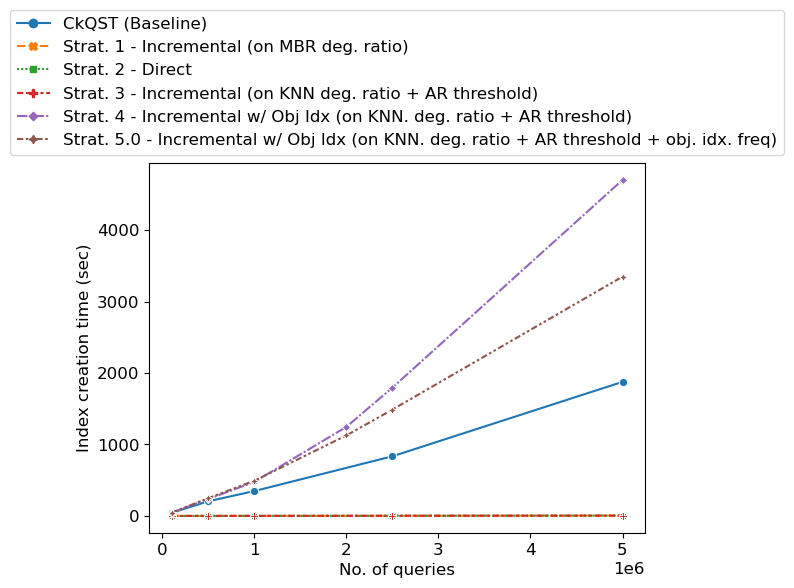

In [ ]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

ax = sns.lineplot(x="No. of queries", y='Index creation time (sec)', hue='name', style='name', data=search_res, errorbar=None,
             markers=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [ ]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
3,198836824971,14159.167748,500000,CkQST (Baseline)
2,212542433963,16469.674322,500000,CkQST (Baseline)
11,648599878,160533.640426,500000,Strat. 1 - Incremental (on MBR deg. ratio)
2,506099114,60489.113896,500000,Strat. 2 - Direct
3,513611911,68362.891844,500000,Strat. 2 - Direct
16,447961067,73648.757550,500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
21,403844560,55536.605972,500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
26,391332896,55328.963416,500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
31,385460929,57338.545458,500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
7,226915810193,24913.077540,500000,Strat. 4 - Incremental w/ Obj Idx (on KNN. deg...


In [ ]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
7,828099938499,61518929619,2500000,CkQST (Baseline)
6,841274510690,45486635922,2500000,CkQST (Baseline)
13,2053888363,602878806961,2500000,Strat. 1 - Incremental (on MBR deg. ratio)
6,2501672940,203616863926,2500000,Strat. 2 - Direct
7,2341089073,243533633079,2500000,Strat. 2 - Direct
18,3098395224,212286033759,2500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
23,2189083277,204944034164,2500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
28,2274977384,209042229473,2500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
33,2156087051,211149812042,2500000,Strat. 3 - Incremental (on KNN deg. ratio + AR...
4,1851172414650,26612714989,2500000,Strat. 4 - Incremental w/ Obj Idx (on KNN. deg...


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

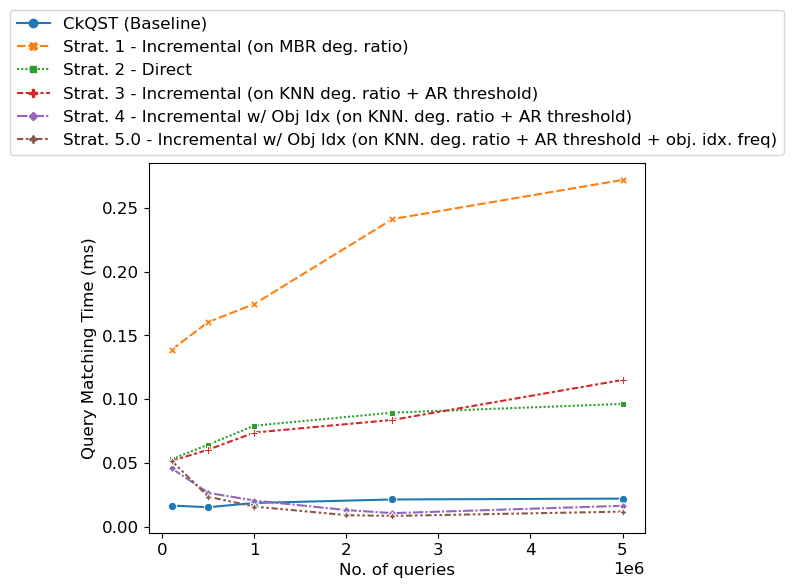

In [ ]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (
            search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

ax = sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar=None, markers=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [ ]:
# Optimization
# - Custom iterator
# - Circle bound calculation